# Projet 2 : Concevez une application au service de la santé publique

## Mission 2 : Analyse univariée et bivariée

In [3]:
# importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [326]:
# chargement des fichiers

df = pd.read_csv('C:\\Users\\mfila\\food_data_clean.csv')
df_pred = pd.read_csv('C:\\Users\\mfila\\food_data_pred.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60255 entries, 0 to 60254
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         60255 non-null  int64  
 1   product_name                 60255 non-null  object 
 2   brands                       60255 non-null  object 
 3   nutrition_grade_fr           60255 non-null  object 
 4   fiber_100g                   60255 non-null  float64
 5   salt_100g                    60255 non-null  float64
 6   fruits-vegetables-nuts_100g  60255 non-null  float64
 7   nutrition-score-fr_100g      60255 non-null  float64
 8   energy_100g                  60255 non-null  float64
 9   fat_100g                     60255 non-null  float64
 10  saturated-fat_100g           60255 non-null  float64
 11  sugars_100g                  60255 non-null  float64
 12  proteins_100g                60255 non-null  float64
 13  product_category

In [35]:
# type des variables de dataframe final

df.columns.to_series().groupby(df.dtypes).groups

{bool: ['label_bio', 'label_viande_fr', 'label_aop', 'label_sans_conservateur', 'label_sans_gluten', 'label_fr'], int64: ['code'], float64: ['fiber_100g', 'salt_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g'], object: ['product_name', 'brands', 'nutrition_grade_fr', 'product_category']}

In [36]:
# variables numériques

var_num = ['fiber_100g', 'salt_100g', 'fruits-vegetables-nuts_100g', 
           'nutrition-score-fr_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g']
print("Variables numériques: ",len(var_num))

# variables qualitatives

var_cat =['label_bio', 'label_viande_fr', 'label_aop', 'label_sans_conservateur', 'label_sans_gluten', 'label_fr',
          'product_name', 'brands', 'nutrition_grade_fr', 'product_category']
print("Variables qualitatives: ",len(var_cat))

Variables numériques:  9
Variables qualitatives:  10


In [37]:
df.head(2)

code    product_name        brands nutrition_grade_fr  fiber_100g  \
0     36252  Lion Peanut x2      Sunridge                  e         2.5   
1  10187319  Mini Confettis  Alice Délice                  d         0.9   

   salt_100g  fruits-vegetables-nuts_100g  nutrition-score-fr_100g  \
0    0.09652                          0.0                     22.0   
1    0.01000                          0.0                     14.0   

   energy_100g  fat_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
0       1883.0   20.0000                12.5         57.5            2.5   
1       1753.0    5.1523                 0.8         87.7            0.6   

  product_category  label_bio  label_viande_fr  label_aop  \
0            other      False            False      False   
1            other      False            False      False   

   label_sans_conservateur  label_sans_gluten  label_fr  
0                    False              False     False  
1                    False              False     False

In [38]:
# types de variables 

df.columns.to_series().groupby(df.dtypes).nunique()

bool       6
int64      1
float64    9
object     4
dtype: int64

### Analyse univariée

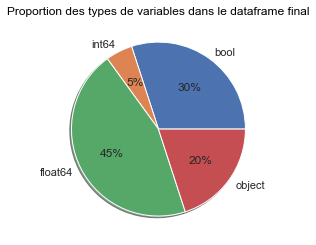

In [39]:
# proportion des types de variables dans le dataframe final 

labels = ['bool', 'int64','float64','object']
plt.pie(df.columns.to_series().groupby(df.dtypes).nunique(),labels=labels, autopct='%.0f%%', shadow=True)
plt.title("Proportion des types de variables dans le dataframe final", color= 'black')
plt.show()

#### Analyse univariée : variables quantitatives

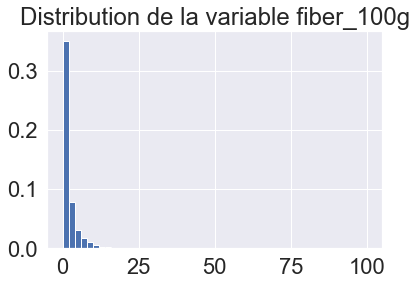

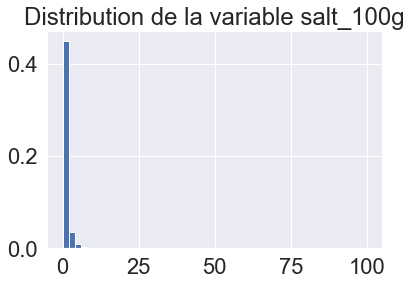

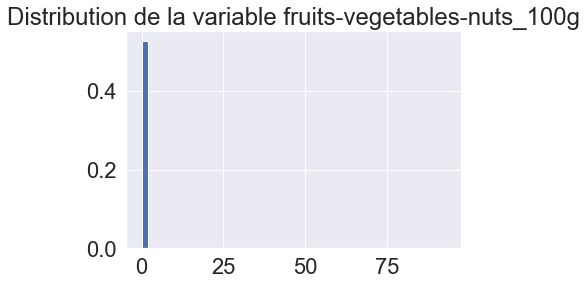

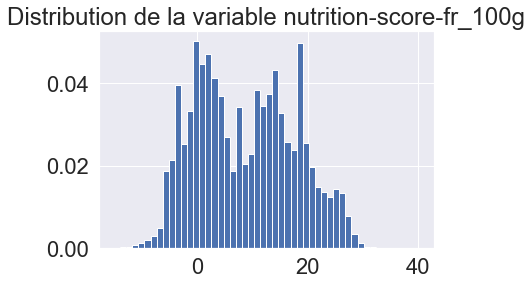

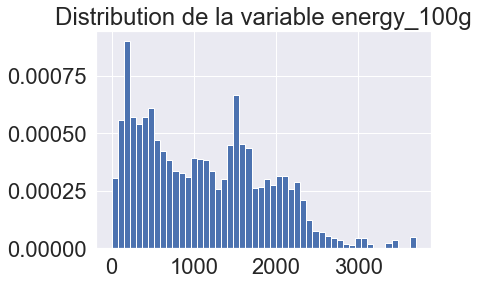

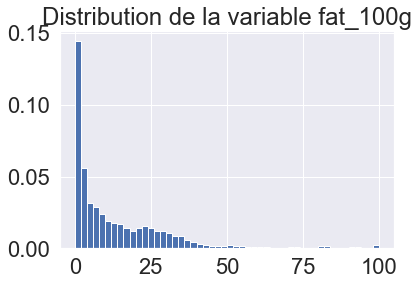

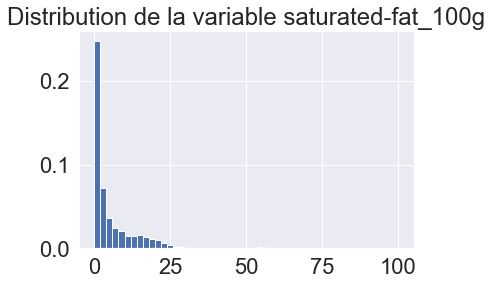

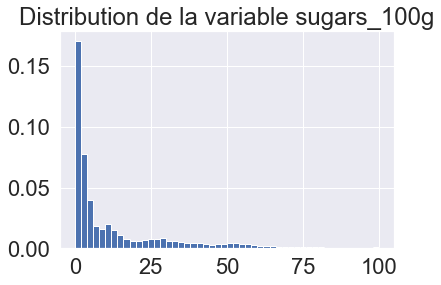

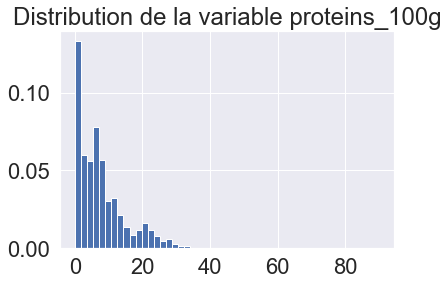

In [40]:
# diagrammes des distributions de variables numériques

sns.set(font_scale=2)
for var in var_num:
    # Histogramme
    df[var].hist(density=True, bins=50)
    plt.title('Distribution de la variable ' + var)
    plt.show()

In [21]:
# description des variables numériques (min, max, mean)

df.describe()

code    fiber_100g     salt_100g  fruits-vegetables-nuts_100g  \
count  6.025500e+04  60255.000000  60255.000000                  60255.00000   
mean   3.837527e+12      1.820965      1.059712                      0.72547   
std    4.961912e+12      3.737173      3.453552                      5.98121   
min    1.000000e+01      0.000000      0.000000                      0.00000   
25%    3.242272e+12      0.000000      0.080000                      0.00000   
50%    3.329770e+12      0.100000      0.570000                      0.00000   
75%    3.700037e+12      2.400000      1.249840                      0.00000   
max    3.661112e+14    100.000000    100.000000                     93.00000   

       nutrition-score-fr_100g   energy_100g      fat_100g  \
count             60255.000000  60255.000000  60255.000000   
mean                  8.686433   1118.750985     13.512830   
std                   9.045910    767.577458     16.766216   
min                 -15.000000      0.000000      0.000000   
25%                   1.000000    435.000000      1.440600   
50%                   9.000000   1046.000000      7.147300   
75%                  15.000000   1657.500000     21.200000   
max                  40.000000   3700.000000    100.000000   

       saturated-fat_100g   sugars_100g  proteins_100g  
count        60255.000000  60255.000000   60255.000000  
mean             5.440544     13.105984       7.778070  
std              8.393593     18.756243       7.698024  
min              0.000000      0.000000       0.000000  
25%              0.300000      1.000000       2.000000  
50%              2.000000      4.000000       6.000000  
75%              7.500000     17.000000      11.000000  
max            100.000000    100.000000      90.000000

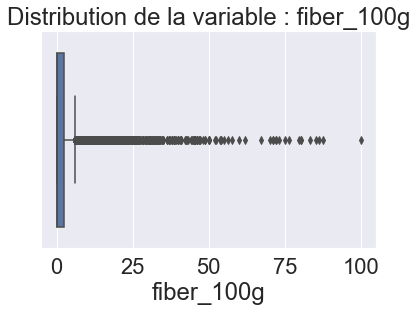

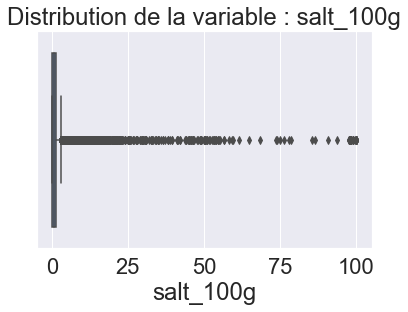

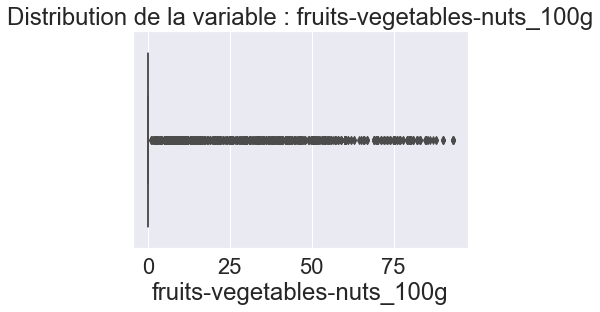

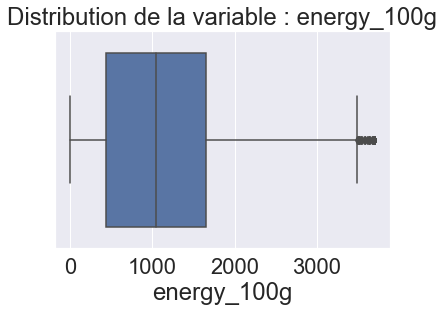

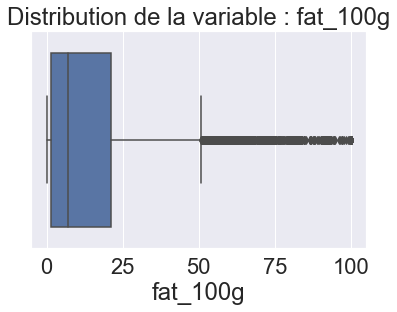

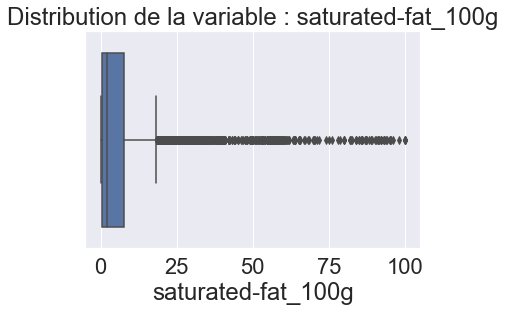

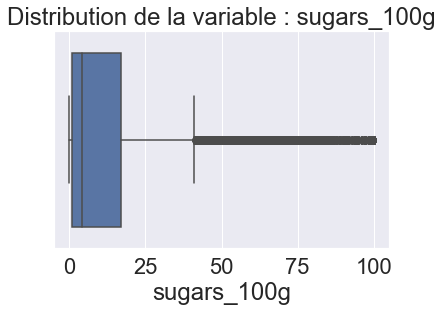

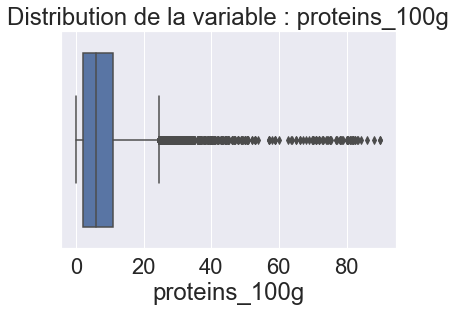

In [22]:
# visualisation des outliers

sns.set(font_scale=2)
for var in var_num:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[var], data=df)
    chaine = 'Distribution de la variable : ' + var
    plt.title(chaine)
    plt.xlabel(var)
    plt.show()
sns.set(font_scale=1)

In [42]:
import statsmodels.api as sm

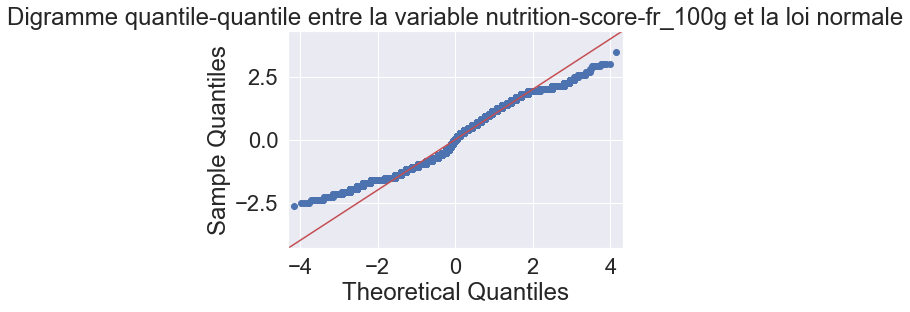

In [44]:
# diagramme quantile-quantile nutriscore et la loi normale

sm.qqplot(df["nutrition-score-fr_100g"], fit=True, line="45")
plt.title("Digramme quantile-quantile entre la variable nutrition-score-fr_100g et la loi normale")
plt.show()

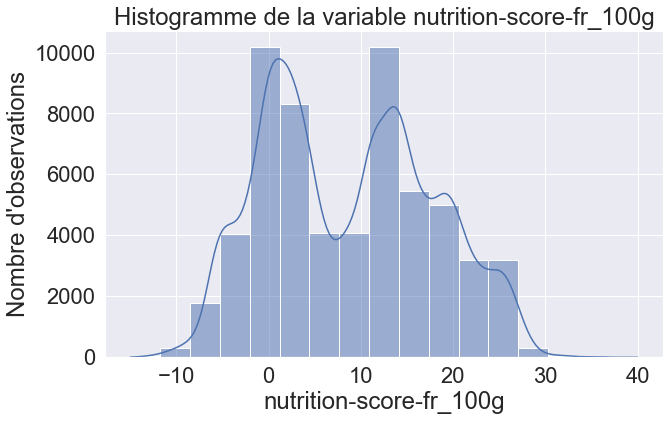

In [48]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.histplot(data=df, x='nutrition-score-fr_100g', bins="sturges", kde=True)
ax.set_xlabel("nutrition-score-fr_100g")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Histogramme de la variable nutrition-score-fr_100g")

plt.show()

#### Analyse univariée : variables qualitatives

In [59]:
# modalités uniques de la variable product_name

df['product_name'].value_counts()

Mayonnaise                       42
Huile d'olive vierge extra       40
Tomato Ketchup                   38
Orange                           37
Nutella                          33
                                 ..
Smoked Tofu                       1
Salade de boulgour courgettes     1
Pesto & Parmesan                  1
Carré Lait-Noisette               1
Flocons De Pois Chiches           1
Name: product_name, Length: 50514, dtype: int64

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [54]:
from wordcloud import WordCloud

In [55]:
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

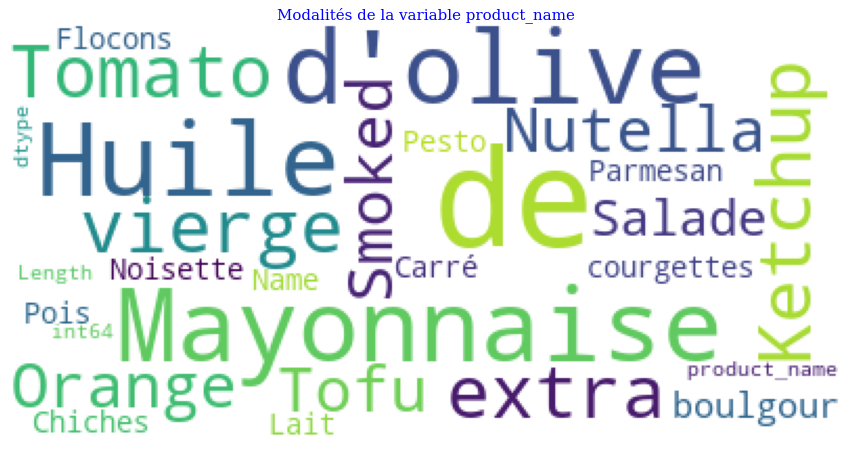

In [396]:
# visualisation des modalités de la varaible product_name

text = df['product_name'].value_counts() 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Modalités de la variable product_name",fontdict=font)
plt.show()

In [80]:
object_columns = ['product_name','brands']

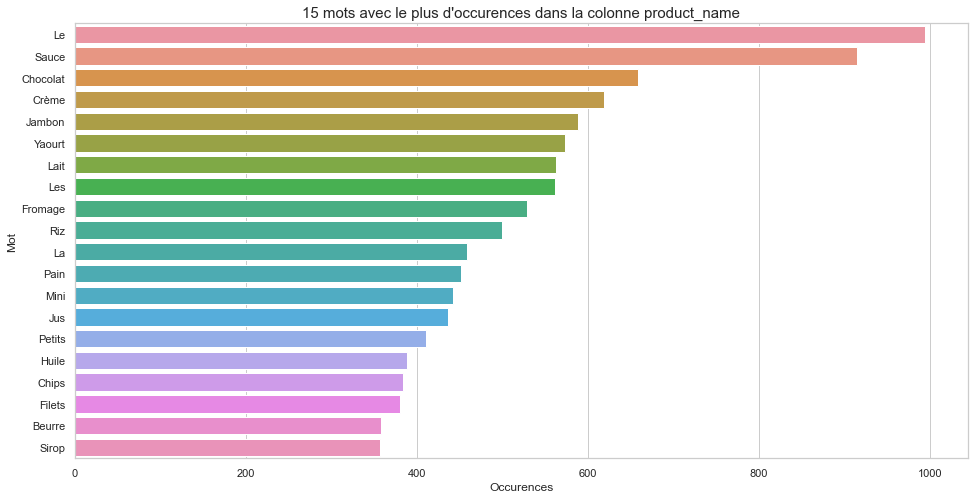

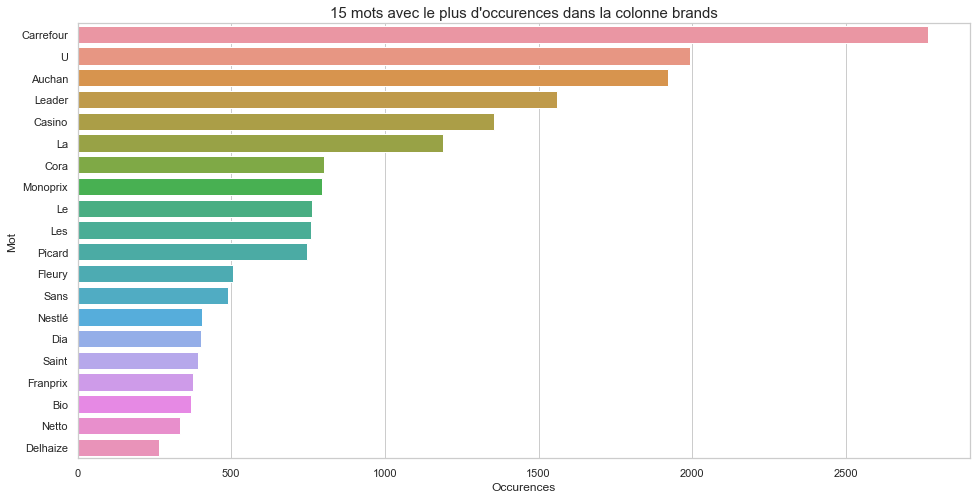

In [81]:
# Occurences des mots pour les colonnes product_name et brands

import collections
mots_populaires = []
for colonne in object_columns :
    liste_mots = [str(i).split(' ', 1)[0] for i in df[colonne].dropna().tolist()]
    mots_populaires.append(collections.Counter(liste_mots).most_common(20))

sns.set(font_scale=2.5)
for nom_colonne, liste_mots in zip(object_columns[0:], mots_populaires[0:]):
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))

    df_mots_utilises = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    df_mots_utilises.head(15)
    sns.barplot(y = 'Mot', x='Occurences', data = df_mots_utilises)
    plt.title('15 mots avec le plus d\'occurences dans la colonne ' + nom_colonne, size=15)
    plt.show()

sns.set(font_scale=1)

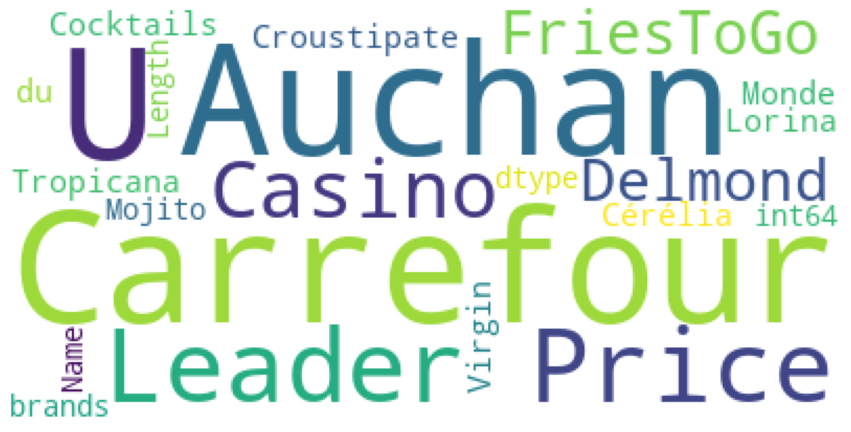

In [82]:
# visualisation des modalités de la varaible brands

text = df['brands'].value_counts() 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

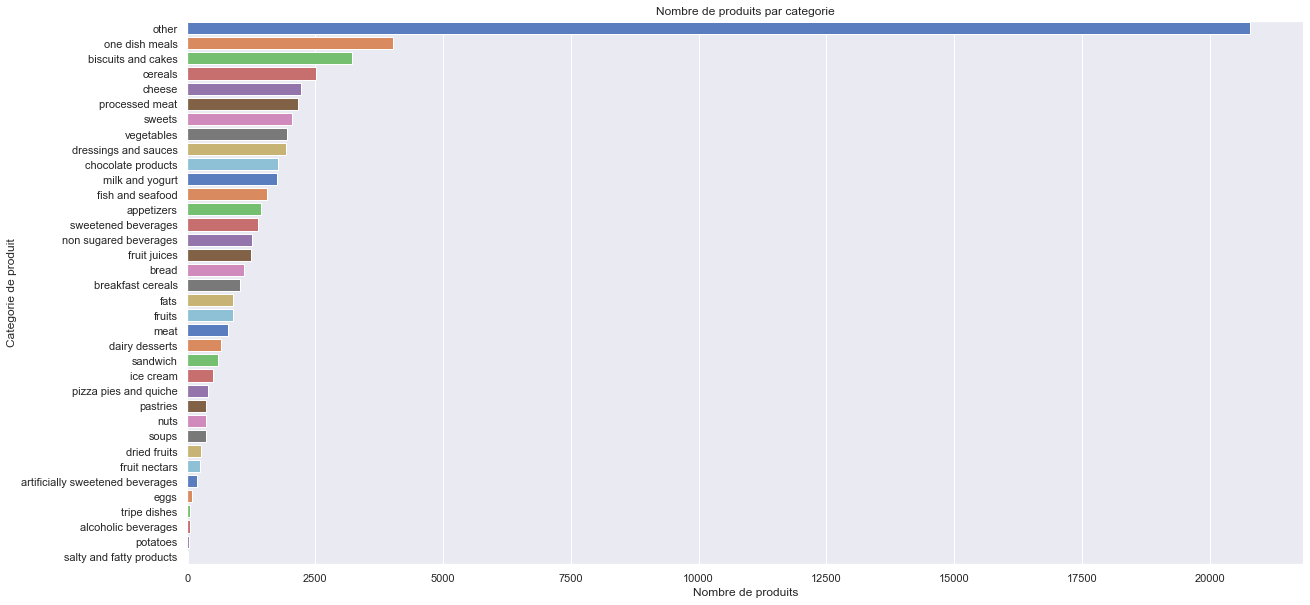

In [127]:
# nombre de produits par categorie

plt.figure(figsize=(20,10))
plt.title('Nombre de produits par categorie')
plt.xlabel('Nombre de produits')
plt.ylabel('Categorie de produit')
sns.barplot(x = df.product_category.value_counts().values,
           y = df.product_category.value_counts().index,palette=sns.color_palette('muted'))
plt.show()

In [121]:
groups = df['product_category'].value_counts().index

In [122]:
groups

Index(['other', 'one dish meals', 'biscuits and cakes', 'cereals', 'cheese',
       'processed meat', 'sweets', 'vegetables', 'dressings and sauces',
       'chocolate products', 'milk and yogurt', 'fish and seafood',
       'appetizers', 'sweetened beverages', 'non sugared beverages',
       'fruit juices', 'bread', 'breakfast cereals', 'fats', 'fruits', 'meat',
       'dairy desserts', 'sandwich', 'ice cream', 'pizza pies and quiche',
       'pastries', 'nuts', 'soups', 'dried fruits', 'fruit nectars',
       'artificially sweetened beverages', 'eggs', 'tripe dishes',
       'alcoholic beverages', 'potatoes', 'salty and fatty products'],
      dtype='object')

In [123]:
groups = ['One-dish meals', 'Biscuits and cakes', 'Cereals', 'Cheese',
       'Processed meat', 'Sweets', 'Dressings and sauces', 'Milk and yogurt',
       'Chocolate products', 'Fish and seafood', 'Sweetened beverages',
       'Appetizers', 'Non-sugared beverages', 'Fruit juices', 'Vegetables',
       'Bread', 'Breakfast cereals', 'Fats', 'Fruits', 'Meat',
       'Dairy desserts', 'Sandwich', 'Ice cream', 'Legumes', 'vegetables',
       'Pizza and quiche', 'Nuts', 'Soups', 'pastries', 'Dried fruits',
       'Fruit nectars']

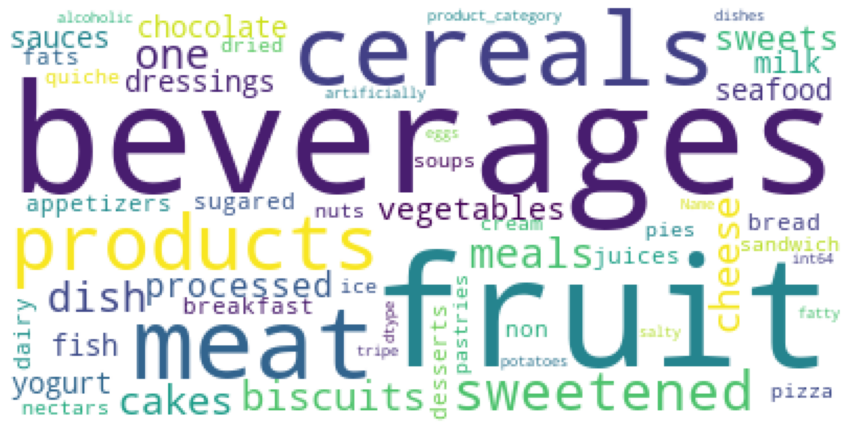

In [128]:
text = df['product_category'].value_counts() 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [125]:
import squarify

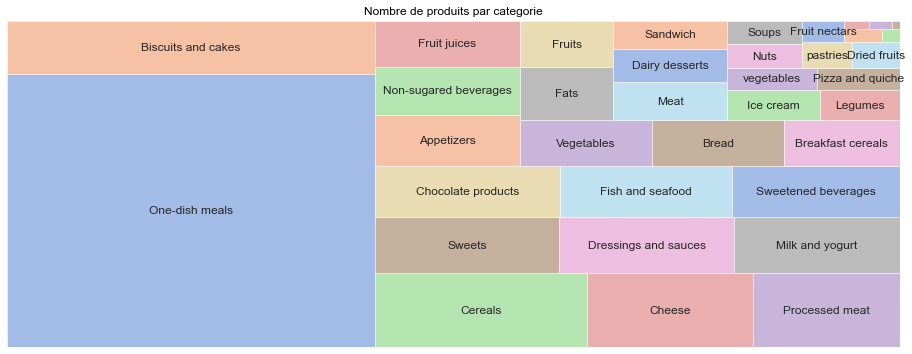

In [126]:
fig, ax = plt.subplots(1, figsize = (16,6))
sizes=df['product_category'].value_counts()
label=groups
color = sns.color_palette('muted')
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.5 )
plt.axis('off')
plt.title("Nombre de produits par categorie", color= 'black')
plt.show()

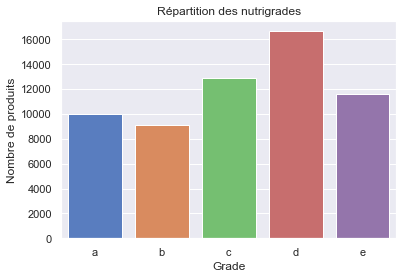

In [88]:
# La répartition des produits par nutrigrade:

plt.figure(figsize=[6, 4])
sns.countplot(data=df, x='nutrition_grade_fr',order= ['a','b','c','d','e'],
              palette=sns.color_palette('muted'))
plt.xlabel('Grade')
plt.ylabel('Nombre de produits')
plt.title('Répartition des nutrigrades')
plt.show()

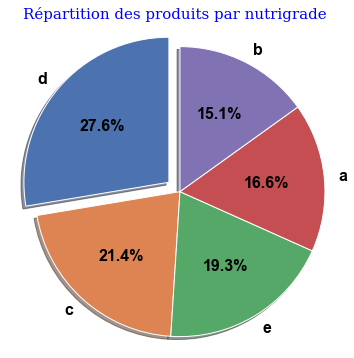

In [92]:
# Proportion des produits par nutrigrade:

categories = df.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 15,
        }

explodes = np.zeros(5)
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (6, 6))
ax1.pie(categories, labels=categories.index, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des produits par nutrigrade", fontdict=font)
plt.show()

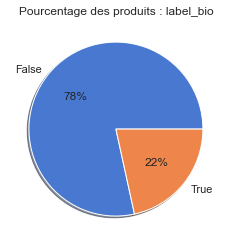

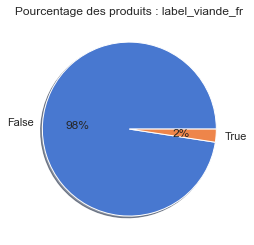

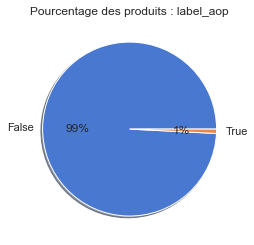

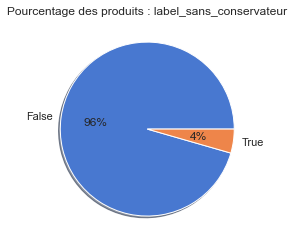

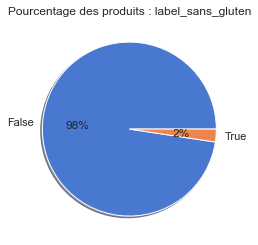

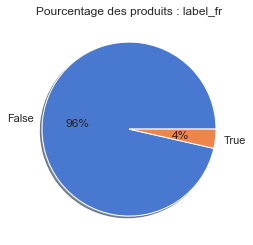

In [131]:
# proportion des produits par labels

colors = sns.color_palette('muted')
var_bool = ['label_bio', 'label_viande_fr', 'label_aop', 'label_sans_conservateur', 'label_sans_gluten', 'label_fr']
for var in var_bool:
    plt.pie(df[var].value_counts(), labels=df[var].unique(), autopct='%.0f%%', colors=colors, shadow=True)
    plt.title('Pourcentage des produits : ' + var)
    plt.show()

### Analyse bivariée

#### Analyse des correlations

In [136]:
df_corr = df[var_num]

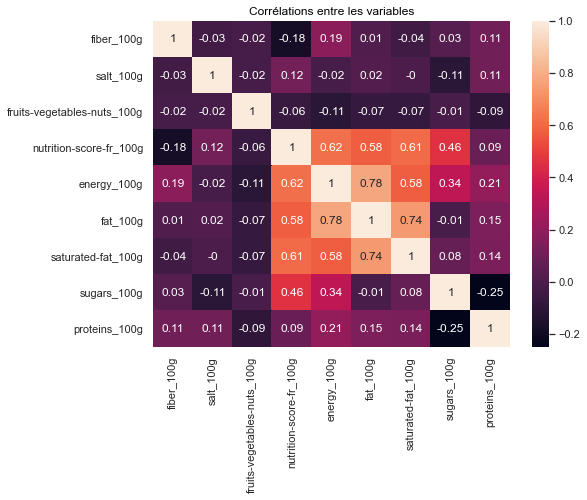

In [134]:
# corrélation des variables (heatmap)

corr = df_corr.corr(method='pearson')
corr = corr.round(decimals=2)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.title("Corrélations entre les variables", color= 'black')
plt.show()

In [138]:
var_num

['fiber_100g',
 'salt_100g',
 'fruits-vegetables-nuts_100g',
 'nutrition-score-fr_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g']

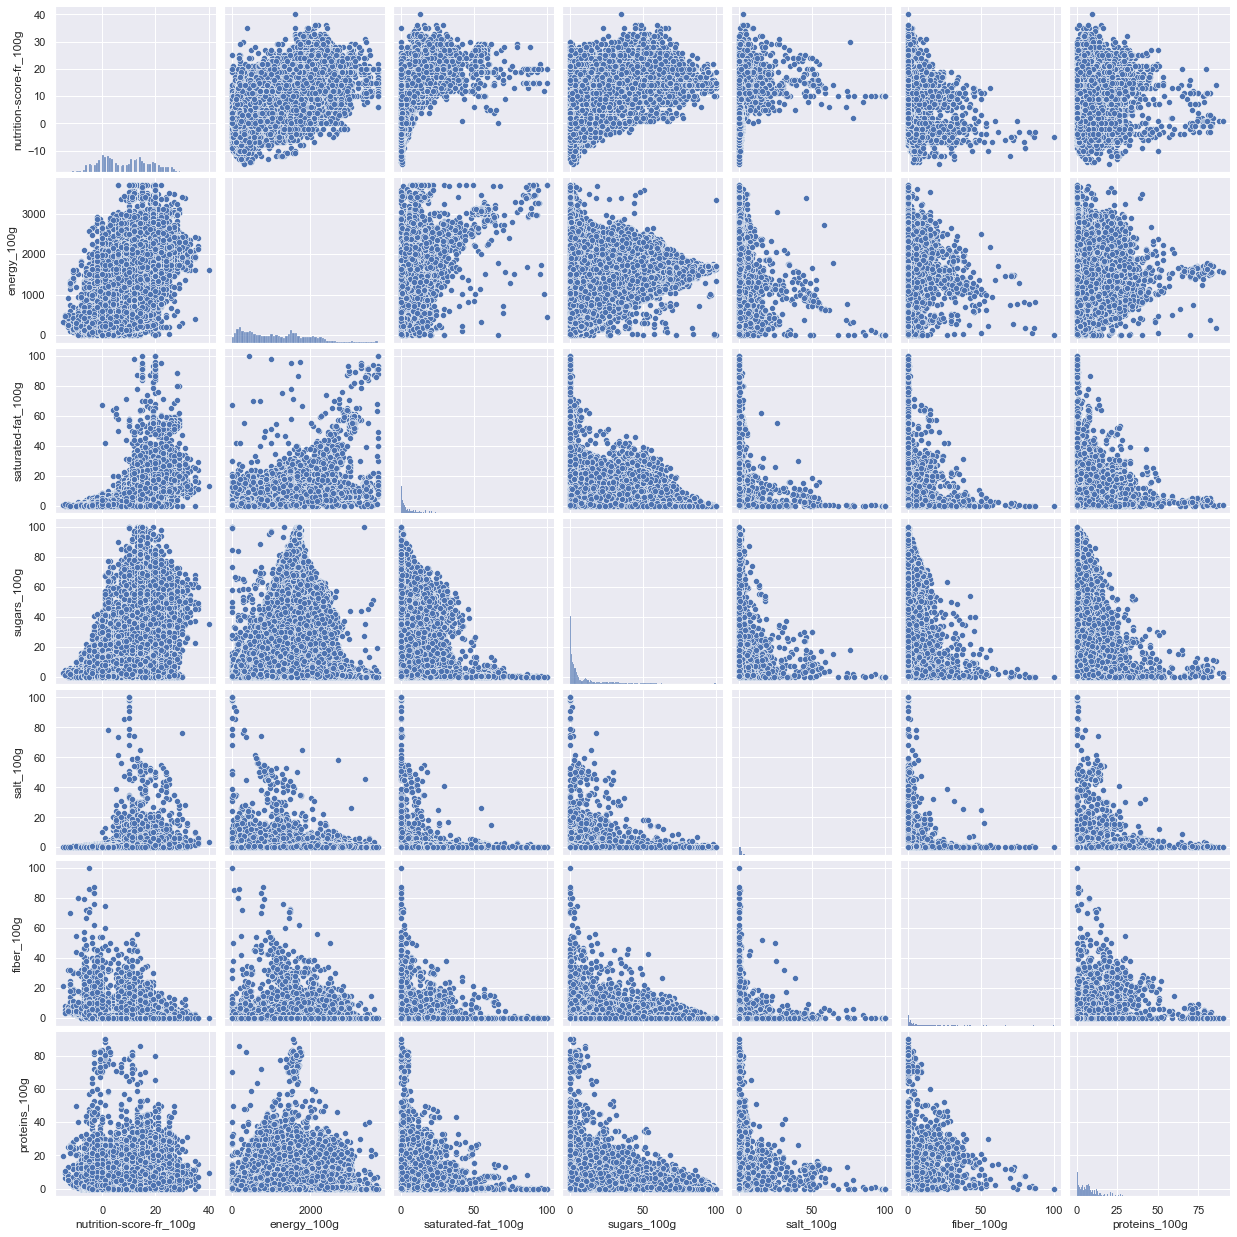

In [148]:
# correlations entre les variables numeriques

df_nutri = df[['nutrition-score-fr_100g','energy_100g','saturated-fat_100g','sugars_100g', 'salt_100g','fiber_100g',
               'proteins_100g']]
sns.pairplot(df_nutri)

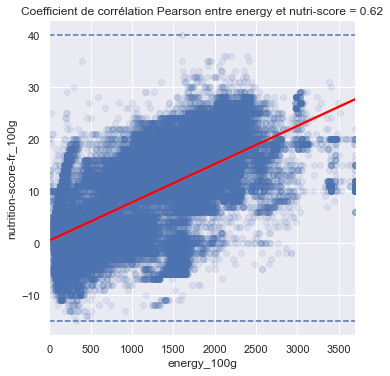

In [397]:
# correlation entre energy et nutriscore

sns.lmplot(data=df,x="energy_100g", y="nutrition-score-fr_100g", line_kws = {'color': 'red'},scatter_kws={'alpha':0.1})
# Ajout ligne horizontale nutriscore maximum
plt.axhline(40, ls='--')
# Ajout ligne horizontale nutriscore minimum
plt.axhline(-15, ls='--')
plt.title("Coefficient de corrélation Pearson entre energy et nutri-score = 0.62")
plt.show()

<AxesSubplot:xlabel='energy_100g', ylabel='fat_100g'>

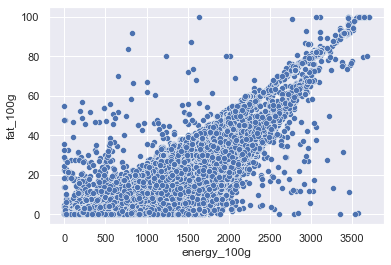

In [146]:
# correlation entre energy et fat (la plus forte corrélation linéaire identifiée)

sns.scatterplot(x="energy_100g",
                    y="fat_100g",
                    data=df)

#### Relations des variables quantitatives / qualitatives

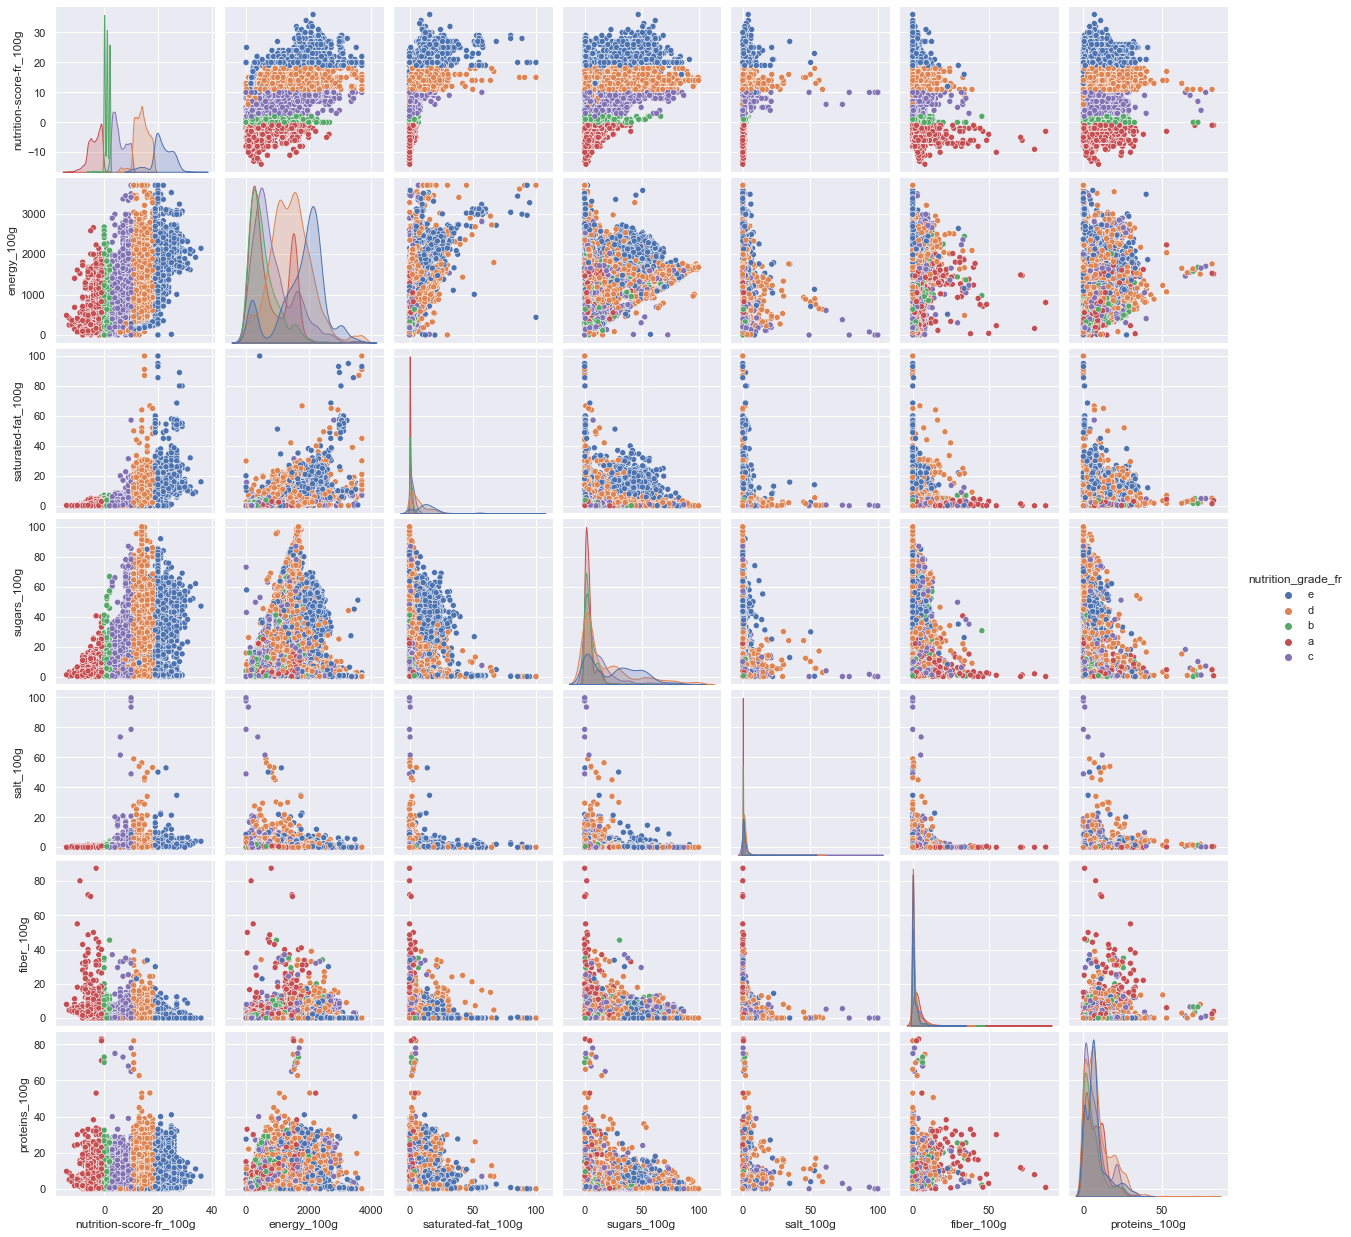

In [153]:
df_pairplot = df[['nutrition_grade_fr','nutrition-score-fr_100g','energy_100g','saturated-fat_100g','sugars_100g', 
                  'salt_100g','fiber_100g','proteins_100g']]
sns.pairplot(df_pairplot.sample(frac=0.2), hue="nutrition_grade_fr")

Text(0.5, 1.0, 'Moyenne valeur energetique par nutrigrade')

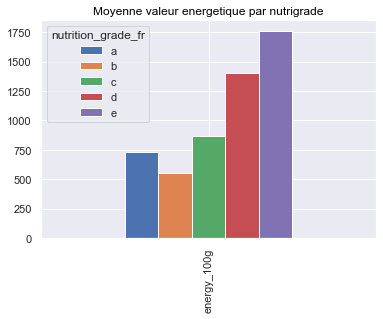

In [155]:
# relation des variables nutrigrade et energy

df_nutri = df[['nutrition_grade_fr','energy_100g']]
df_nutri.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur energetique par nutrigrade", color= 'black')

Text(0.5, 1.0, 'Moyenne valeur saturated_fat par nutrigrade')

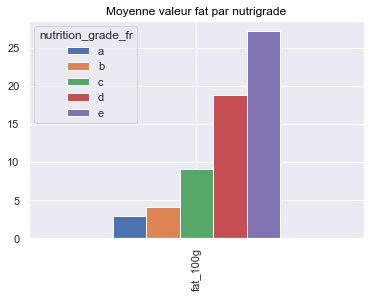

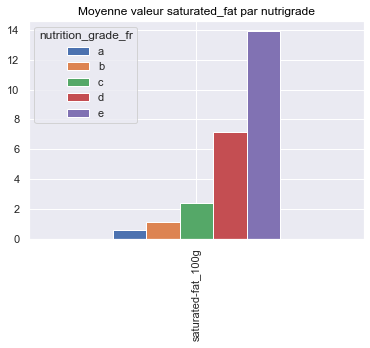

In [169]:
# relations des variables nutrigrade et fat/saturated_fat

df_fat = df[['nutrition_grade_fr','fat_100g']]
df_fat.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur fat par nutrigrade", color= 'black')

df_sat_fat = df[['nutrition_grade_fr','saturated-fat_100g']]
df_sat_fat.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur saturated_fat par nutrigrade", color= 'black')




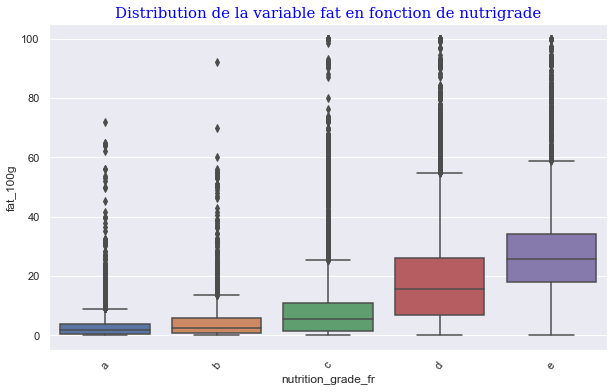

In [161]:
# nutrigrade et fat boxplot

fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='nutrition_grade_fr', y='fat_100g', order=['a','b','c','d','e'])
plt.setp(ax.get_xticklabels(), rotation=50)
plt.title("Distribution de la variable fat en fonction de nutrigrade", fontdict=font)
plt.show()

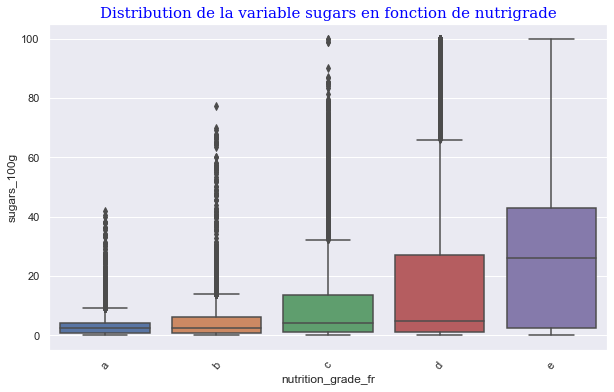

In [162]:
# relations des varaibles nutrigrade et sugars (boxplot)

fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='nutrition_grade_fr', y='sugars_100g', order=['a','b','c','d','e'])
plt.setp(ax.get_xticklabels(), rotation=50)
plt.title("Distribution de la variable sugars en fonction de nutrigrade", fontdict=font)
plt.show()


Text(0.5, 1.0, 'Moyenne valeur salt par nutrigrade')

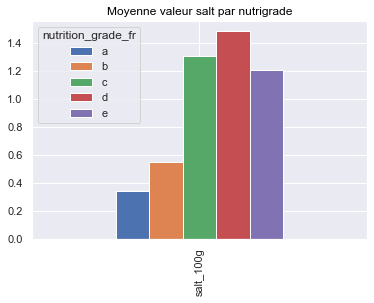

In [168]:
# relations des variables nutrigrade et sel (boxplot)

df_sel = df[['nutrition_grade_fr','salt_100g']]
df_sel.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur salt par nutrigrade", color= 'black')

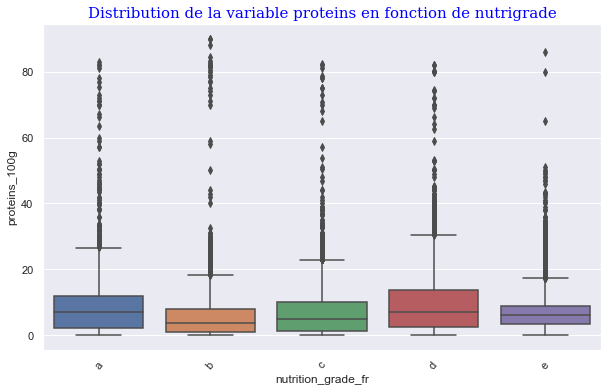

In [177]:
# relations des varaibles nutrigrade et proteins (boxplot)

fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='nutrition_grade_fr', y='proteins_100g', order=['a','b','c','d','e'])
plt.setp(ax.get_xticklabels(), rotation=50)
plt.title("Distribution de la variable proteins en fonction de nutrigrade", fontdict=font)
plt.show()


Text(0.5, 1.0, 'Moyenne valeur proteins par nutrigrade')

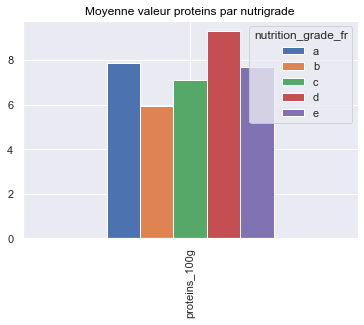

In [176]:
# relations des variables nutrigrade et proteins

df_sel = df[['nutrition_grade_fr','proteins_100g']]
df_sel.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur proteins par nutrigrade", color= 'black')

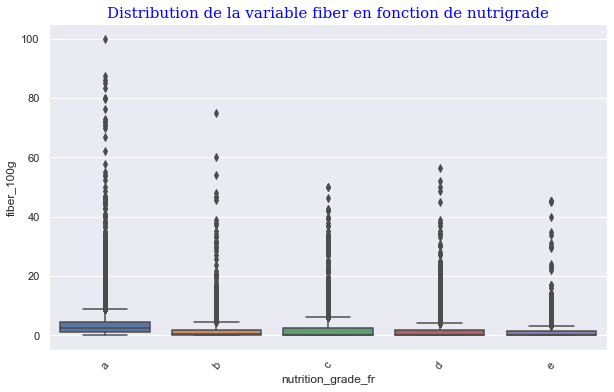

In [174]:
# relations des varaibles nutrigrade et fibres (boxplot)

fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='nutrition_grade_fr', y='fiber_100g', order=['a','b','c','d','e'])
plt.setp(ax.get_xticklabels(), rotation=50)
plt.title("Distribution de la variable fiber en fonction de nutrigrade", fontdict=font)
plt.show()

Text(0.5, 1.0, 'Moyenne valeur fiber par nutrigrade')

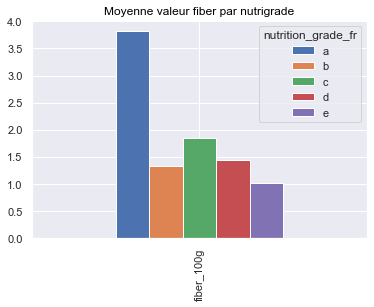

In [400]:
# relations des variables nutrigrade et fibers

df_fiber = df[['nutrition_grade_fr','fiber_100g']]
df_fiber.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur fiber par nutrigrade", color= 'black')

Text(0.5, 1.0, 'Moyenne valeur fruits-vegetables-nuts_100g par nutrigrade')

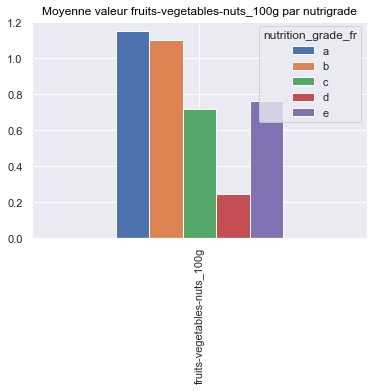

In [402]:
# relations des variables nutrigrade et proteins

df_fruit = df[['nutrition_grade_fr','fruits-vegetables-nuts_100g']]
df_fruit.groupby('nutrition_grade_fr').mean().T.plot(kind='bar')
plt.title("Moyenne valeur fruits-vegetables-nuts_100g par nutrigrade", color= 'black')

Text(0.5, 1.0, 'Moyenne valeur de nutri-score des produits labelisés sans conservateur')

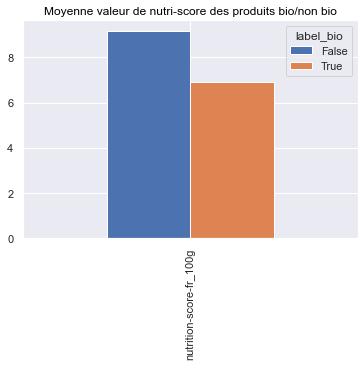

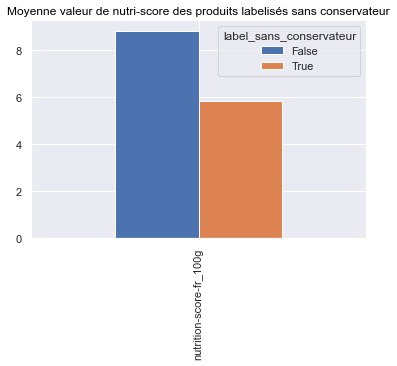

In [191]:
# relations des variables nutriscore et label_bio

df_label_bio = df[['label_bio','nutrition-score-fr_100g']]
df_label_bio.groupby('label_bio').mean().T.plot(kind='bar')
plt.title("Moyenne valeur de nutri-score des produits bio/non bio", color= 'black')

df_label_sans_conservateur = df[['label_sans_conservateur','nutrition-score-fr_100g']]
df_label_sans_conservateur.groupby('label_sans_conservateur').mean().T.plot(kind='bar')
plt.title("Moyenne valeur de nutri-score des produits labelisés sans conservateur", color= 'black')

#### Relations des variables qualitatives / qualitatives

Text(0.5, 1.0, 'Proportion de produits sans conservateurs par nutrigrade')

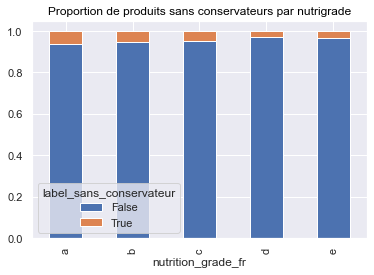

In [194]:
# relations des variables nutrigrade et label_sans_conservateur

pd.crosstab(df.nutrition_grade_fr,df.label_sans_conservateur, normalize='index').plot(kind='bar',stacked=True)
plt.title("Proportion de produits sans conservateurs par nutrigrade", color= 'black')

In [195]:
contigency = pd.crosstab(df.nutrition_grade_fr,df.label_sans_conservateur,normalize='index')

In [196]:
contigency

label_sans_conservateur     False     True 
nutrition_grade_fr                         
a                        0.937256  0.062744
b                        0.945227  0.054773
c                        0.948935  0.051065
d                        0.968292  0.031708
e                        0.967944  0.032056

In [198]:
from scipy.stats import chi2_contingency

In [67]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(f'chi-squared = {c}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 174.43261563973863
p value= 1.1694661583321751e-36
degrees of freedom = 4


In [200]:
# Calculer Chi-squared test 

X2 = chi2_contingency(contigency, correction=False)[0]
N = np.sum(contigency)
minimum_dimension = min(contigency.shape)-1
  
# Calculer Cramer V

result = np.sqrt((X2/N) / minimum_dimension)
print(result)

label_sans_conservateur
False    0.060786
True     0.275354
dtype: float64


Text(0.5, 1.0, 'Proportion de produits bio par nutrigrade')

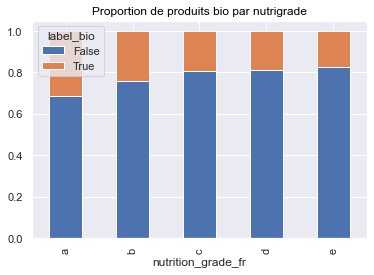

In [202]:
# relations des variables nutrigrade et label_bio

pd.crosstab(df.nutrition_grade_fr, df.label_bio, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de produits bio par nutrigrade", color= 'black')

In [403]:
contigency = pd.crosstab(df.nutrition_grade_fr,df.label_bio,normalize='index')

In [404]:
# Chi-square test of independence. 

c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(f'chi-squared = {c}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 0.07692025335973969
p value= 0.9992791017806655
degrees of freedom = 4


In [214]:
# relations des variables nutri-grade et categorie de produit

pd.crosstab(df['nutrition_grade_fr'], df['product_category'])

product_category    alcoholic beverages  appetizers  \
nutrition_grade_fr                                    
a                                     0          17   
b                                     2          53   
c                                     2         414   
d                                    29         703   
e                                    12         250   

product_category    artificially sweetened beverages  biscuits and cakes  \
nutrition_grade_fr                                                         
a                                                  0                  21   
b                                                 70                  29   
c                                                 68                 205   
d                                                 33                1195   
e                                                 16                1773   

product_category    bread  breakfast cereals  cereals  cheese  \
nutrition_grade_fr                                              
a                     364                194     1651     108   
b                     289                 92      390      61   
c                     304                444      277     235   
d                     132                286      175    1696   
e                      18                  9       33     131   

product_category    chocolate products  dairy desserts  ...  \
nutrition_grade_fr                                      ...   
a                                   11              34  ...   
b                                   12              74  ...   
c                                   47             415  ...   
d                                  305             126  ...   
e                                 1409              11  ...   

product_category    pizza pies and quiche  potatoes  processed meat  \
nutrition_grade_fr                                                    
a                                       9        25               1   
b                                      66         4              85   
c                                     123         8             531   
d                                     205         2             662   
e                                       3         0             893   

product_category    salty and fatty products  sandwich  soups  \
nutrition_grade_fr                                              
a                                          0        50     36   
b                                          0       103    259   
c                                          2       167     68   
d                                         11       253      0   
e                                          2        19      0   

product_category    sweetened beverages  sweets  tripe dishes  vegetables  
nutrition_grade_fr                                                         
a                                    41      17             1        1628  
b                                    46     210            18         191  
c                                    36     272             4          92  
d                                   242    1028            24          34  
e                                  1022     527             0           6  

[5 rows x 36 columns]

In [215]:
contigency = pd.crosstab(df.nutrition_grade_fr,df.product_category,normalize='index')

In [216]:
# Chi-square test of independence. 

c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(f'chi-squared = {c}\np value= {p}\ndegrees of freedom = {dof}')

chi-squared = 3.707170912455428
p value= 1.0
degrees of freedom = 140


In [409]:
# relations des variables nutri-grade et categorie de produit

cross_bio_cat = pd.crosstab(df['product_category'],df['label_bio'],normalize='index')

In [425]:
cross_bio_cat = cross_bio_cat.reset_index()

In [435]:
cross_bio_cat

label_bio                  product_category     False      True
0                       alcoholic beverages  0.888889  0.111111
1                                appetizers  0.854558  0.145442
2          artificially sweetened beverages  0.962567  0.037433
3                        biscuits and cakes  0.762643  0.237357
4                                     bread  0.747967  0.252033
5                         breakfast cereals  0.633171  0.366829
6                                   cereals  0.611639  0.388361
7                                    cheese  0.822949  0.177051
8                        chocolate products  0.732623  0.267377
9                            dairy desserts  0.816667  0.183333
10                     dressings and sauces  0.835318  0.164682
11                             dried fruits  0.820896  0.179104
12                                     eggs  0.509804  0.490196
13                                     fats  0.700333  0.299667
14                         fish and seafood  0.776129  0.223871
15                             fruit juices  0.736632  0.263368
16                            fruit nectars  0.761719  0.238281
17                                   fruits  0.764374  0.235626
18                                ice cream  0.871032  0.128968
19                                     meat  0.871537  0.128463
20                          milk and yogurt  0.730023  0.269977
21                    non sugared beverages  0.733492  0.266508
22                                     nuts  0.858311  0.141689
23                           one dish meals  0.797364  0.202636
24                                    other  0.800635  0.199365
25                                 pastries  0.796791  0.203209
26                    pizza pies and quiche  0.844828  0.155172
27                                 potatoes  0.820513  0.179487
28                           processed meat  0.807551  0.192449
29                 salty and fatty products  0.733333  0.266667
30                                 sandwich  0.954392  0.045608
31                                    soups  0.719008  0.280992
32                      sweetened beverages  0.868061  0.131939
33                                   sweets  0.796495  0.203505
34                             tripe dishes  0.744681  0.255319
35                               vegetables  0.766274  0.233726

In [434]:
cross_bio_cat.loc[:,True].mean()

0.21518893458994268

In [439]:
cross_cons_cat = pd.crosstab(df['product_category'],df['label_sans_conservateur'],normalize='index')
cross_cons_cat

label_sans_conservateur              False     True 
product_category                                    
alcoholic beverages               1.000000  0.000000
appetizers                        0.896312  0.103688
artificially sweetened beverages  0.866310  0.133690
biscuits and cakes                0.952529  0.047471
bread                             0.964770  0.035230
breakfast cereals                 0.972683  0.027317
cereals                           0.972288  0.027712
cheese                            0.984312  0.015688
chocolate products                0.996076  0.003924
dairy desserts                    0.943939  0.056061
dressings and sauces              0.920766  0.079234
dried fruits                      0.921642  0.078358
eggs                              1.000000  0.000000
fats                              0.977802  0.022198
fish and seafood                  0.945806  0.054194
fruit juices                      0.930567  0.069433
fruit nectars                     0.941406  0.058594
fruits                            0.780158  0.219842
ice cream                         0.988095  0.011905
meat                              0.957179  0.042821
milk and yogurt                   0.950342  0.049658
non sugared beverages             0.950676  0.049324
nuts                              0.983651  0.016349
one dish meals                    0.881651  0.118349
other                             0.980420  0.019580
pastries                          0.927807  0.072193
pizza pies and quiche             0.992611  0.007389
potatoes                          0.923077  0.076923
processed meat                    0.971915  0.028085
salty and fatty products          1.000000  0.000000
sandwich                          0.976351  0.023649
soups                             0.760331  0.239669
sweetened beverages               0.886806  0.113194
sweets                            0.982960  0.017040
tripe dishes                      0.893617  0.106383
vegetables                        0.950794  0.049206

In [440]:
cross_fr_cat = pd.crosstab(df['product_category'],df['label_fr'],normalize='index')
cross_fr_cat

label_fr                             False     True 
product_category                                    
alcoholic beverages               0.977778  0.022222
appetizers                        0.951287  0.048713
artificially sweetened beverages  0.973262  0.026738
biscuits and cakes                0.925845  0.074155
bread                             0.970190  0.029810
breakfast cereals                 0.961951  0.038049
cereals                           0.959620  0.040380
cheese                            0.958315  0.041685
chocolate products                0.971413  0.028587
dairy desserts                    0.921212  0.078788
dressings and sauces              0.977732  0.022268
dried fruits                      0.988806  0.011194
eggs                              0.980392  0.019608
fats                              0.943396  0.056604
fish and seafood                  0.880645  0.119355
fruit juices                      0.960894  0.039106
fruit nectars                     0.949219  0.050781
fruits                            0.965051  0.034949
ice cream                         0.932540  0.067460
meat                              0.957179  0.042821
milk and yogurt                   0.913242  0.086758
non sugared beverages             0.980907  0.019093
nuts                              0.989101  0.010899
one dish meals                    0.929140  0.070860
other                             0.992206  0.007794
pastries                          0.949198  0.050802
pizza pies and quiche             0.972906  0.027094
potatoes                          1.000000  0.000000
processed meat                    0.917127  0.082873
salty and fatty products          0.866667  0.133333
sandwich                          0.988176  0.011824
soups                             0.942149  0.057851
sweetened beverages               0.970440  0.029560
sweets                            0.973223  0.026777
tripe dishes                      0.808511  0.191489
vegetables                        0.975910  0.024090

#### ANOVA

In [222]:
from scipy import stats

# test de normalité de distribution des variables numériques

for column in var_num:
    print('________\n{}'.format(column))
    D, p = stats.kstest(df[column].dropna(), 
                     'norm', 
                     args=(df[column].mean(), df[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("HO est rejetée : {} n'est pas distribuée normalement".format(column))
    else:
        print("HO n'est pas rejetée")

________
fiber_100g
p = 0.0
HO est rejetée : fiber_100g n'est pas distribuée normalement
________
salt_100g
p = 0.0
HO est rejetée : salt_100g n'est pas distribuée normalement
________
fruits-vegetables-nuts_100g
p = 0.0
HO est rejetée : fruits-vegetables-nuts_100g n'est pas distribuée normalement
________
nutrition-score-fr_100g
p = 0.0
HO est rejetée : nutrition-score-fr_100g n'est pas distribuée normalement
________
energy_100g
p = 0.0
HO est rejetée : energy_100g n'est pas distribuée normalement
________
fat_100g
p = 0.0
HO est rejetée : fat_100g n'est pas distribuée normalement
________
saturated-fat_100g
p = 0.0
HO est rejetée : saturated-fat_100g n'est pas distribuée normalement
________
sugars_100g
p = 0.0
HO est rejetée : sugars_100g n'est pas distribuée normalement
________
proteins_100g
p = 0.0
HO est rejetée : proteins_100g n'est pas distribuée normalement


In [225]:
df_grade_a = df.loc[df['nutrition_grade_fr']=='a',:]
df_grade_b = df.loc[df['nutrition_grade_fr']=='b',:]
df_grade_c = df.loc[df['nutrition_grade_fr']=='c',:]
df_grade_d = df.loc[df['nutrition_grade_fr']=='d',:]
df_grade_e = df.loc[df['nutrition_grade_fr']=='e',:]

In [229]:
# test de Bartlett pour les variables numériques des 5 groups nutri-grade
# H0 : les groupes sont homoscédastiques,variances identiques

for column in var_num:
    print('________\n{}'.format(column))
    F_val, p_value = stats.bartlett(df_grade_a[column], df_grade_b[column], df_grade_c[column], 
                                    df_grade_d[column], df_grade_e[column])
    print(f'Test Bartlett - resultats: F={F_val}, P_value ={p_value}\n')
    print('Groupes homoscédastiques') if p_value > 0.05 else print(
    'Groupes hétéroscédastiques')

________
fiber_100g
Test Bartlett - resultats: F=10976.000608343387, P_value =0.0

Groupes hétéroscédastiques
________
salt_100g
Test Bartlett - resultats: F=60035.17907009753, P_value =0.0

Groupes hétéroscédastiques
________
fruits-vegetables-nuts_100g
Test Bartlett - resultats: F=10565.852900902244, P_value =0.0

Groupes hétéroscédastiques
________
nutrition-score-fr_100g
Test Bartlett - resultats: F=16715.76591743261, P_value =0.0

Groupes hétéroscédastiques
________
energy_100g
Test Bartlett - resultats: F=2615.133527527965, P_value =0.0

Groupes hétéroscédastiques
________
fat_100g
Test Bartlett - resultats: F=30129.919316663898, P_value =0.0

Groupes hétéroscédastiques
________
saturated-fat_100g
Test Bartlett - resultats: F=73770.56516447189, P_value =0.0

Groupes hétéroscédastiques
________
sugars_100g
Test Bartlett - resultats: F=33421.29186598787, P_value =0.0

Groupes hétéroscédastiques
________
proteins_100g
Test Bartlett - resultats: F=854.2770678970812, P_value =1.341763

In [231]:
# Anova à un facteur

for column in var_num:
    print('________\n{}'.format(column))
    f_val, p_val = stats.f_oneway(df_grade_a[column], df_grade_b[column], df_grade_c[column], 
                                    df_grade_d[column], df_grade_e[column])
    print(f'ANOVA resultats: F={f_val}, P_value={p_val}\n')
    print('Probablement les mêmes moyennes') if p_val > 0.05 else print(
    'Probablement pas les mêmes moyennes')

________
fiber_100g
ANOVA resultats: F=1004.8802019992013, P_value=0.0

Probablement pas les mêmes moyennes
________
salt_100g
ANOVA resultats: F=246.88700683551986, P_value=9.605346253918371e-211

Probablement pas les mêmes moyennes
________
fruits-vegetables-nuts_100g
ANOVA resultats: F=49.01310155379848, P_value=3.0990541840420275e-41

Probablement pas les mêmes moyennes
________
nutrition-score-fr_100g
ANOVA resultats: F=156420.66280898565, P_value=0.0

Probablement pas les mêmes moyennes
________
energy_100g
ANOVA resultats: F=7116.9240607974025, P_value=0.0

Probablement pas les mêmes moyennes
________
fat_100g
ANOVA resultats: F=5980.939291587352, P_value=0.0

Probablement pas les mêmes moyennes
________
saturated-fat_100g
ANOVA resultats: F=7450.376735520595, P_value=0.0

Probablement pas les mêmes moyennes
________
sugars_100g
ANOVA resultats: F=3191.6150349343393, P_value=0.0

Probablement pas les mêmes moyennes
________
proteins_100g
ANOVA resultats: F=320.44905430950985, P_

In [235]:
# Test de Kruskal-Wallis

for column in var_num:
    print('________\n{}'.format(column))
    result = stats.kruskal(df_grade_a[column], df_grade_b[column], df_grade_c[column], 
                                    df_grade_d[column], df_grade_e[column])
    print(f'Test de Kruskal-Wallis resultats: F={f_val}, P_value={p_val}\n')
    print('Les medianes sont les mêmes pour tous les groups') if p_val > 0.05 else print(
    'Les medianes different')

________
fiber_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
salt_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
fruits-vegetables-nuts_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
nutrition-score-fr_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
energy_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
fat_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
saturated-fat_100g
Test de Kruskal-Wallis resultats: F=320.44905430950985, P_value=2.3947805062256043e-273

Les medianes different
________
sugars_100g
Test de Kruskal-Wal

## Mission 3 : Analyse multivariée

#### ACP

In [248]:
# Sélection des colonnes pour l'ACP
cols_acp = [
 'fiber_100g',
 'salt_100g',
 'fruits-vegetables-nuts_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g']

# Nombre de composantes
n_comp = len(cols_acp)

# Données pour l'ACP
data_acp = df[cols_acp]

# Noms affichés
names = df['product_name']
features = data_acp.columns
X = data_acp.values

In [249]:
from sklearn import decomposition, preprocessing

In [250]:
# Centrage et Réduction car une ACP ne peut se faire que si les données sont centrées et réduites 
# (transformation pour que moyenne = 0, écart-type = 1).

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [251]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

In [252]:
# Valeurs propres ou variances des composantes principales
val_propres = pca.explained_variance_
val_propres

array([2.50634128, 1.34983054, 1.08738946, 0.982475  , 0.92719678,
       0.6907113 , 0.35827335, 0.09791505])

In [253]:
# Vecteurs propres de l'ACP non réduite = combinaison linéaire permettant de
# définir les variables principales
pca.components_.T

array([[ 7.75566358e-02,  5.07130701e-02,  8.45355579e-01,
         2.51202629e-01,  1.84048570e-01,  3.81831111e-01,
         1.63441780e-01, -8.54531900e-02],
       [ 7.07188422e-04,  3.96085843e-01, -1.87210438e-01,
        -2.11722784e-01,  8.70040874e-01,  7.76630827e-02,
         1.33529082e-02,  7.76157226e-03],
       [-1.05056408e-01, -1.20678732e-01, -2.34007833e-01,
         9.15294556e-01,  2.41125574e-01, -1.52381983e-01,
        -1.65749484e-02,  1.54746378e-02],
       [ 5.71657857e-01, -1.24919383e-01,  1.37259851e-01,
         1.77310217e-02,  1.02885340e-01, -1.21756074e-01,
        -4.76130131e-01,  6.21560898e-01],
       [ 5.76379670e-01,  5.42495971e-02, -1.77606357e-01,
         8.48051465e-02, -5.18277460e-02,  2.26356131e-01,
        -3.28705354e-01, -6.81276085e-01],
       [ 5.27195220e-01,  1.96077660e-04, -2.44348817e-01,
         5.09526389e-02, -6.74379958e-02,  1.47235018e-01,
         7.70879969e-01,  1.98193554e-01],
       [ 1.23204563e-01, -6.682326

In [254]:
df_acp = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=cols_acp).T
df_acp

PC1       PC2       PC3       PC4       PC5  \
fiber_100g                   0.077557  0.050713  0.845356  0.251203  0.184049   
salt_100g                    0.000707  0.396086 -0.187210 -0.211723  0.870041   
fruits-vegetables-nuts_100g -0.105056 -0.120679 -0.234008  0.915295  0.241126   
energy_100g                  0.571658 -0.124919  0.137260  0.017731  0.102885   
fat_100g                     0.576380  0.054250 -0.177606  0.084805 -0.051828   
saturated-fat_100g           0.527195  0.000196 -0.244349  0.050953 -0.067438   
sugars_100g                  0.123205 -0.668233  0.169473 -0.192844  0.337236   
proteins_100g                0.175577  0.600748  0.238233  0.083758 -0.139520   

                                  PC6       PC7       PC8  
fiber_100g                   0.381831  0.163442 -0.085453  
salt_100g                    0.077663  0.013353  0.007762  
fruits-vegetables-nuts_100g -0.152382 -0.016575  0.015475  
energy_100g                 -0.121756 -0.476130  0.621561  
fat_100g                     0.226356 -0.328705 -0.681276  
saturated-fat_100g           0.147235  0.770880  0.198194  
sugars_100g                 -0.490090  0.180783 -0.292877  
proteins_100g               -0.705000  0.105586 -0.129868

In [255]:
# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [256]:
# fonction permettant de visualiser les planes factoriels

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   

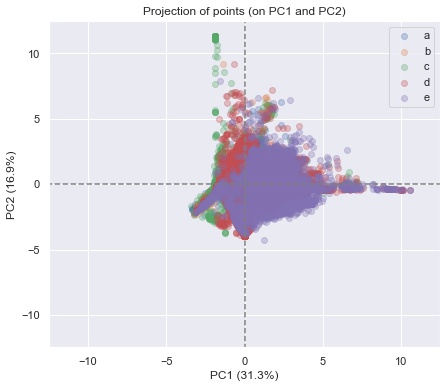

In [258]:
# display the data points in their groups:

display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = df['nutrition_grade_fr'], alpha = 0.3)

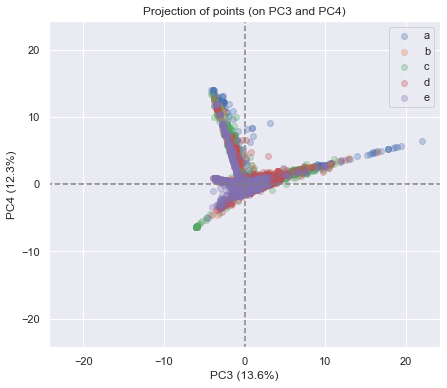

In [259]:
# display the data points in their groups:

display_factorial_planes(X_reduced, 4, pca, [(2,3)], illustrative_var = df['nutrition_grade_fr'], alpha = 0.3)

In [ ]:
Projection des points ne permet pas bien distinguer visuellement les groupes nutrigrade. 

In [260]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

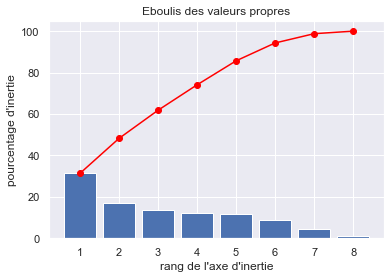

In [261]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [262]:
pca.explained_variance_ratio_.cumsum()*100

array([ 31.32874611,  48.20134789,  61.79349054,  74.07422427,
        85.6639917 ,  94.29773967,  98.7760822 , 100.        ])

In [263]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

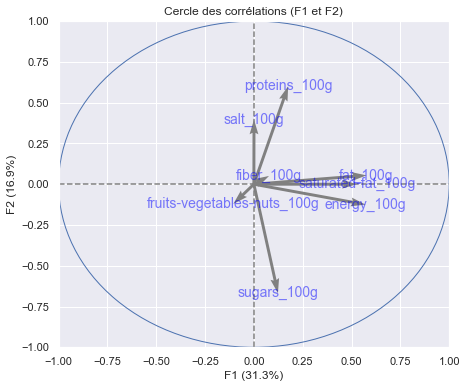

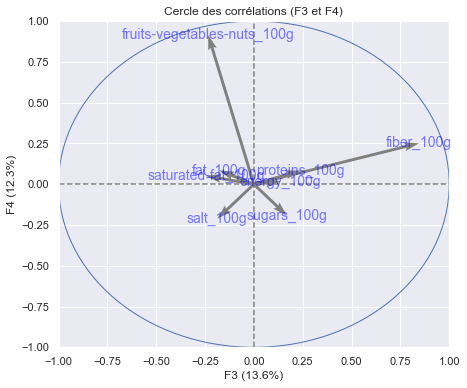

In [264]:
# Cercle des corrélations
pcs = pca.components_
features = data_acp.columns

display_circles(pcs, 4, pca, [(0,1),(2,3),(4,5)], labels = np.array(features),lims=(-1, 1, -1, 1))

In [265]:
# Affichage 
res=pd.DataFrame({'Variable': features})
for i in range(0,7):
    res['F'+str(i+1)]=pca.components_[i]
res

Variable        F1        F2        F3        F4  \
0                   fiber_100g  0.077557  0.050713  0.845356  0.251203   
1                    salt_100g  0.000707  0.396086 -0.187210 -0.211723   
2  fruits-vegetables-nuts_100g -0.105056 -0.120679 -0.234008  0.915295   
3                  energy_100g  0.571658 -0.124919  0.137260  0.017731   
4                     fat_100g  0.576380  0.054250 -0.177606  0.084805   
5           saturated-fat_100g  0.527195  0.000196 -0.244349  0.050953   
6                  sugars_100g  0.123205 -0.668233  0.169473 -0.192844   
7                proteins_100g  0.175577  0.600748  0.238233  0.083758   

         F5        F6        F7  
0  0.184049  0.381831  0.163442  
1  0.870041  0.077663  0.013353  
2  0.241126 -0.152382 -0.016575  
3  0.102885 -0.121756 -0.476130  
4 -0.051828  0.226356 -0.328705  
5 -0.067438  0.147235  0.770880  
6  0.337236 -0.490090  0.180783  
7 -0.139520 -0.705000  0.105586

### Modelisation

In [341]:
df_knn = df.copy()

# choix des varaibles explicatives
data_knn = df_knn[['fiber_100g', 'salt_100g',
       'fruits-vegetables-nuts_100g', 'energy_100g','fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'proteins_100g']]

# variable à prédire
target_knn = df_knn['nutrition_grade_fr']

In [342]:
from sklearn.model_selection import train_test_split

# division de jeu de données en train et test
xtrain, xtest, ytrain, ytest = train_test_split(data_knn, target_knn, train_size=0.8)

In [343]:
from sklearn import neighbors

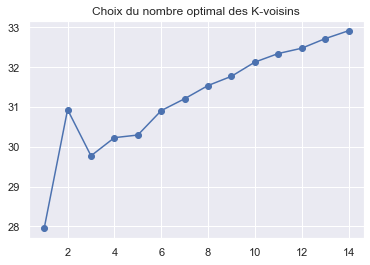

In [405]:
# choix de nombre de k voisins

errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(1,15), errors, 'o-')
plt.title("Choix du nombre optimal des K-voisins")
plt.show()

In [345]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [346]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.279479


In [347]:
knn.score(xtest, ytest)

0.720521118579371

In [349]:
df_reg = df.copy()
df_reg = df_reg[['fiber_100g', 'salt_100g',
       'fruits-vegetables-nuts_100g', 'energy_100g','fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'proteins_100g','nutrition-score-fr_100g']]

In [350]:
# modele de regression linéaire

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_reg.copy()
y = X['nutrition-score-fr_100g']
X = X.drop(['nutrition-score-fr_100g'],axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [351]:
# qualité de prediction (regression linéaire)

lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)

R² sur jeu d'entraînement :  0.672894616055864
R² sur jeu de test 0.6639417591682312
Poids de chaque variable dans la régression [-1.87735073  1.35711592  0.06754461  1.00340177  2.58473955  2.46119486
  4.08409332  1.00922111]


In [352]:
# modèle Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50],
    'verbose' : [1]
}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [354]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50], 'verbose': [1]})

In [355]:
rfr.best_estimator_

RandomForestRegressor(n_estimators=50, verbose=1)

In [356]:
# qualité de prediction, modèle Random Forst regressor

print('R² sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('R² sur jeu de test', rfr.best_estimator_.score(X_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R² sur jeu d'entraînement :  0.9934662964815185
R² sur jeu de test 0.9576490339151127


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [357]:
rfr.best_estimator_.feature_importances_

array([0.06309685, 0.1440815 , 0.00217003, 0.04451326, 0.01683831,
       0.55250342, 0.15896177, 0.01783487])

Text(0.5, 1.0, 'Importance des variables explicatives (modèle Random Forest)')

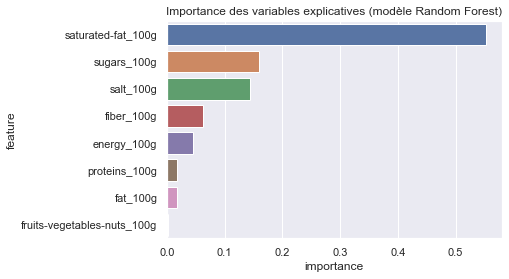

In [358]:
# importance des variables explicatives (modèle Random Forest regressor)

random_forest_features = pd.DataFrame({'feature' : df_reg.drop(['nutrition-score-fr_100g'],axis=1).columns,
                                      'importance' : rfr.best_estimator_.feature_importances_})
random_forest_features.sort_values(by='importance',ascending=False, inplace=True)

sns.barplot(y = random_forest_features['feature'], x=random_forest_features['importance'])
plt.title('Importance des variables explicatives (modèle Random Forest)')

In [359]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'nutriscore_prediction' : rfr.predict(X_test)}).reset_index()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [360]:
# valeurs de nutriscore réeles et predites par Random forest

resultat.head(10)

index  nutriscore_reel  nutriscore_prediction
0  49102             -3.0               -3.28000
1  25272             -1.0               -0.28000
2  32681             22.0               17.06000
3  57397              2.0                2.00000
4  57721              3.0                3.28000
5  33010              0.0                0.02000
6  16046             12.0               14.93338
7  12783              9.0                8.86000
8  51454             13.0               12.46000
9  27248             -6.0               -6.00000

In [361]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         3847 non-null   int64  
 1   product_name                 3847 non-null   object 
 2   brands                       3847 non-null   object 
 3   nutrition_grade_fr           0 non-null      float64
 4   fiber_100g                   3847 non-null   float64
 5   salt_100g                    3847 non-null   float64
 6   fruits-vegetables-nuts_100g  3847 non-null   float64
 7   nutrition-score-fr_100g      0 non-null      float64
 8   energy_100g                  3847 non-null   float64
 9   fat_100g                     3847 non-null   float64
 10  saturated-fat_100g           3847 non-null   float64
 11  sugars_100g                  3847 non-null   float64
 12  proteins_100g                3847 non-null   float64
 13  product_category  

In [362]:
x_pred = df_pred[['fiber_100g', 'salt_100g',
       'fruits-vegetables-nuts_100g', 'energy_100g','fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'proteins_100g']].values
# transformation
x_pred = scaler.fit_transform(x_pred)
# On récupère les prédictions sur les données absentes
predicted = rfr.predict(x_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [363]:
predicted

array([ 7.04, -0.3 ,  0.12, ..., 18.02, 11.26,  9.2 ])

In [364]:
df_pred1 = df_pred.copy()

In [365]:
# remplacer les valeurs de nutriscore absentes par les valeurs predites
df_pred1.loc[:,['nutrition-score-fr_100g']] = predicted

In [366]:
# calculer les nutri-grades qui correspondent aux nutri-scores predites  

def nutrigrade(row):
    if row["nutrition-score-fr_100g"] <= -1 :
        nutrition_grade_fr = "a"
    elif ((row["nutrition-score-fr_100g"] >= 0) & (row["nutrition-score-fr_100g"] <= 2)) :
        nutrition_grade_fr = "b"
    elif ((row["nutrition-score-fr_100g"] >= 3) & (row["nutrition-score-fr_100g"] <= 10)) :
        nutrition_grade_fr = "c"
    elif ((row["nutrition-score-fr_100g"] >= 11) & (row["nutrition-score-fr_100g"] <= 18)) :
        nutrition_grade_fr = "d"
    else:
        nutrition_grade_fr = "e"
        
    return nutrition_grade_fr

df_pred1['nutrition_grade_fr'] = df_pred1.apply(lambda row: nutrigrade(row),axis=1)

In [369]:
df_pred1.describe()

code   fiber_100g    salt_100g  fruits-vegetables-nuts_100g  \
count  3.847000e+03  3847.000000  3847.000000                  3847.000000   
mean   3.979634e+12     0.799713     2.021974                     1.951391   
std    6.076115e+12     3.040851     8.072628                    10.570860   
min    1.627700e+04     0.000000     0.000000                     0.000000   
25%    3.222473e+12     0.000000     0.040000                     0.000000   
50%    3.329750e+12     0.000000     0.550000                     0.000000   
75%    3.760021e+12     0.000000     1.400000                     0.000000   
max    3.564700e+14    58.300000   100.000000                   100.000000   

       nutrition-score-fr_100g  energy_100g     fat_100g  saturated-fat_100g  \
count              3847.000000  3847.000000  3847.000000         3847.000000   
mean                  7.581295  1095.521881    12.858287            5.078807   
std                   9.029834   787.675935    17.943137            7.117942   
min                  -8.745000     0.000000     0.000000            0.000000   
25%                  -0.040000   380.000000     0.800000            0.253961   
50%                   5.420000  1121.000000     5.500000            1.948000   
75%                  14.088333  1570.500000    19.000000            7.200000   
max                  28.960000  3700.000000   100.000000           66.000000   

       sugars_100g  proteins_100g  
count  3847.000000    3847.000000  
mean     12.639186       8.137683  
std      18.058574       7.916183  
min       0.000000       0.000000  
25%       1.407290       1.784150  
50%       4.000000       6.642200  
75%      15.500000      11.610000  
max     100.000000      80.000000

In [391]:
# verification des nutri-grade attribués en fonction de type de produits (sample)

df_pred1.loc[:,('product_name','product_category','nutrition-score-fr_100g','nutrition_grade_fr')].sample(10)

product_name   product_category  \
350                                       Glace vanille          ice cream   
3632         Rapidoats Délicieux petis flocons d'avoine  breakfast cereals   
1737                   confiture artisanale de rhubarbe             sweets   
2058                                  Camembert Fermier             cheese   
2788                    Alter eco Noir amandes entières              other   
908                            Fécule de pomme de terre              other   
3790                         Huile d'Olive vierge extra               fats   
424                   Soupe Harira Marocaine aux épices     one dish meals   
2606                           Barquito oignons lardons     one dish meals   
2135  12 Yaourts sucrés aromatisés (Parfums : Fraise...    milk and yogurt   

      nutrition-score-fr_100g nutrition_grade_fr  
350                     12.50                  d  
3632                     0.26                  b  
1737                    14.70                  d  
2058                    13.84                  d  
2788                    21.58                  e  
908                     15.52                  d  
3790                    19.06                  e  
424                     -2.86                  a  
2606                     0.56                  b  
2135                     0.92                  b

In [ ]:
Le nutri-grade attribué semble correspondre aux types de produits pour le sample affiché.

C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distr

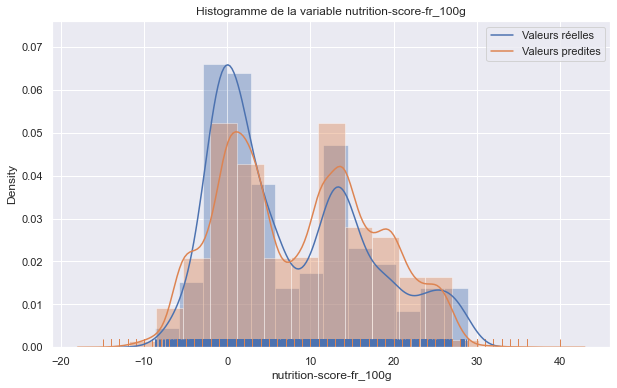

In [392]:
# distribution des valeurs nutri-score réelles et prédites

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.distplot(x=df_pred1['nutrition-score-fr_100g'], bins="sturges", rug=True)
ax = sns.distplot(x=df['nutrition-score-fr_100g'], bins="sturges", rug=True)

ax.set_xlabel("nutrition-score-fr_100g")
ax.set_title("Histogramme de la variable nutrition-score-fr_100g")
plt.legend(['Valeurs réelles', 'Valeurs predites'])
plt.show()